In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

pd.set_option("display.max_columns", None)

In [4]:
bc = load_breast_cancer()

In [5]:
features = bc.data
target = bc.target
target_names = bc.target_names

In [6]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Class Distribution: 212 - Malignant, 357 - Benign

In [7]:
df = pd.DataFrame(features, columns=bc.feature_names)
df["cancer_status"] = target
df["target_label"] = df["cancer_status"].replace(to_replace=[0,1], value=target_names)

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer_status,target_label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [9]:
df.shape

(569, 32)

In [10]:
df["cancer_status"].value_counts()

1    357
0    212
Name: cancer_status, dtype: int64

In [11]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer_status
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
X = df.drop(["cancer_status", "target_label"], axis=1)
Y = df["cancer_status"]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=Y)

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(x_train)

StandardScaler()

In [16]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
def build_model(model, x_train, y_train, x_test):
    model.fit(x_train, y_train)
    yHat = tree_model.predict(x_test)
    return yHat

In [18]:
def evaluate_model(model, x_train, y_train, y_test, yHat):
    print("Train accuracy: ", model.score(x_train, y_train))
    print("Test accuracy: ", accuracy_score(y_test, yHat))

    cmf = confusion_matrix(y_test, yHat)
    sns.heatmap(pd.DataFrame(cmf), annot=True, fmt='g')
    plt.xlabel("P R E D I C T")
    plt.ylabel("R E A L")
    plt.show()

### Decision Tree

In [19]:
tree = DecisionTreeClassifier(random_state=42)

In [20]:
# search for best parameters
params = {
    "max_depth": np.arange(1, 21),
    "min_samples_split": [50, 60, 80, 100], 
    "min_samples_leaf": [10, 20, 30, 40, 50],
    "criterion": ["gini", "entropy"]
}

In [21]:
grid_search = GridSearchCV(estimator=tree,
                          param_grid=params,
                          cv=10,
                          scoring="accuracy"
                          )

In [22]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'min_samples_leaf': [10, 20, 30, 40, 50],
                         'min_samples_split': [50, 60, 80, 100]},
             scoring='accuracy')

In [23]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 20,
 'min_samples_split': 50}

In [24]:
tree_model = grid_search.best_estimator_

In [25]:
tree_yHat = build_model(tree_model, x_train, y_train, x_test)

Train accuracy:  0.957286432160804
Test accuracy:  0.9181286549707602


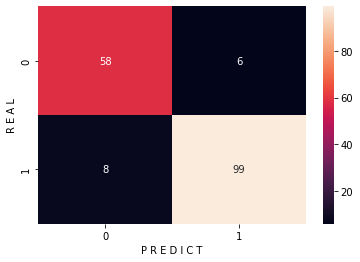

In [26]:
evaluate_model(tree_model, x_train, y_train, y_test, tree_yHat)

### Random forest

In [27]:
forest = RandomForestClassifier()

In [28]:
params = {
    "n_estimators": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "max_depth": [2],
    "min_samples_split": [50], 
    "min_samples_leaf": [20],
    "criterion": ["gini"]
}

In [29]:
grid_search = GridSearchCV(estimator=forest,
                          param_grid=params,
                          cv=10,
                          scoring="accuracy"
                          )

In [30]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2],
                         'min_samples_leaf': [20], 'min_samples_split': [50],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             scoring='accuracy')

In [31]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 20,
 'min_samples_split': 50,
 'n_estimators': 20}

In [32]:
forest_model = grid_search.best_estimator_

In [33]:
forest_yHat = build_model(forest_model, x_train, y_train, x_test)

Train accuracy:  0.9597989949748744
Test accuracy:  0.9181286549707602


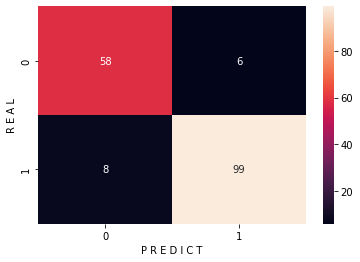

In [34]:
evaluate_model(forest_model, x_train, y_train, y_test, forest_yHat)

### MLP

In [35]:
mlp = MLPClassifier(random_state=42, hidden_layer_sizes=(16,))

In [36]:
params = {
    "activation": ["identity", "logistic", "tanh", "relu"],
    "alpha": [0.0001, 0.001],
    "max_iter": [500, 800, 1000, 1200],
    "learning_rate_init": [0.001, 0.01]
}

In [37]:
grid_search = GridSearchCV(estimator=mlp,
                          param_grid=params,
                          cv=10,
                          scoring="accuracy"
                          )

In [38]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=MLPClassifier(hidden_layer_sizes=(16,), random_state=42),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001],
                         'learning_rate_init': [0.001, 0.01],
                         'max_iter': [500, 800, 1000, 1200]},
             scoring='accuracy')

In [39]:
grid_search.best_params_

{'activation': 'logistic',
 'alpha': 0.0001,
 'learning_rate_init': 0.001,
 'max_iter': 500}

In [40]:
mlp_model = grid_search.best_estimator_

In [41]:
mlp_yHat = build_model(mlp_model, x_train, y_train, x_test)

Train accuracy:  0.9874371859296482
Test accuracy:  0.9181286549707602


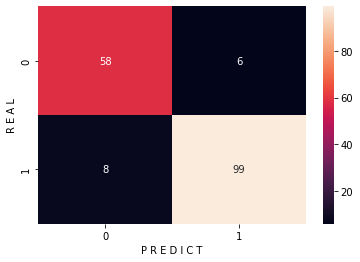

In [42]:
evaluate_model(mlp_model, x_train, y_train, y_test, mlp_yHat)